In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
# Start by importing the required libraries first
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2021-09-21 15:58:32.003192: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-21 15:58:32.003332: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
insurance = pd.read_csv("../input/insurance/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Now lets create the X and y i.e. the dependent variables
X = insurance_one_hot.drop("charges",axis = 1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [6]:
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
len(X), len(X_test), len(X_train), len(y), len(y_train), len(y_test)

(1338, 268, 1070, 1338, 1070, 268)

In [8]:
# Now to build a neural net for this 

tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = "mae",
             optimizer = "Adam",
             metrics = ["mae"])

# Fit the model
hist = model.fit(X_train, y_train, epochs = 500)


2021-09-21 15:58:37.610202: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-21 15:58:37.613129: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-21 15:58:37.613173: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-21 15:58:37.613198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adae1ad346cd): /proc/driver/nvidia/version does not exist
2021-09-21 15:58:37.613551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 12353.0241 - mae: 12353.0241
Epoch 5/500
34/34 [==============================] - 0s 979us/step - loss: 11243.3973 - mae: 11243.3973
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7732.2963 - mae: 7732.2963
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7537.6738 - mae: 7537.6738
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - ma

In [9]:
# Now its time to evaluate the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3169.9734 - mae: 3169.9734


[3169.973388671875, 3169.973388671875]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Text(0, 0.5, 'epochs')

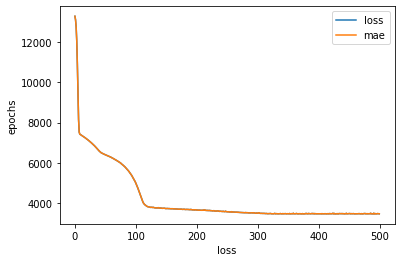

In [11]:
pd.DataFrame(hist.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

In [12]:
# We still need to preprocess the data 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))
    
# Create the X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]
    
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    
# Fit the column transformer to our training data
ct.fit(X_train)
    
# Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [13]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [14]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [15]:
# Build a neural net again to fit on our normalized data
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(loss = "mae",
             optimizer = tf.keras.optimizers.Adam(lr = 0.01),
             metrics = ["mae"])

# Fit the model
hist = model2.fit(X_train_normal, y_train, epochs = 200)


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13254.8789 - mae: 13254.8789
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 11784.7705 - mae: 11784.7705
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 7911.8887 - mae: 7911.8887
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7968.5021 - mae: 7968.5021
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7328.0949 - mae: 7328.0949
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 6783.2005 - mae: 6783.2005
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 5888.1688 - mae: 5888.1688
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 4855.4473 - mae: 4855.4473
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 3780.6063 - mae: 3780.6063
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 3722.8481 - mae: 3722.

In [16]:
#Evaluate the model now
model2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 955us/step - loss: 3162.5095 - mae: 3162.5095


[3162.509521484375, 3162.509521484375]